# DAAN 862 Lesson 9 Assignment 1

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error


In [52]:
# Load Breast Cancer dataset
data = pd.read_csv('Parkinsons-Disease-Prediction-raw_dataset.csv')

## Question 1:  Perform Exploratory Data Analysis and Remove motor_UPDRS Column

In [55]:
print(data.head())

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [57]:
# Descriptive statistics
print("\nData Summary:")
print(data.describe())


Data Summary:
          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
mi

In [59]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


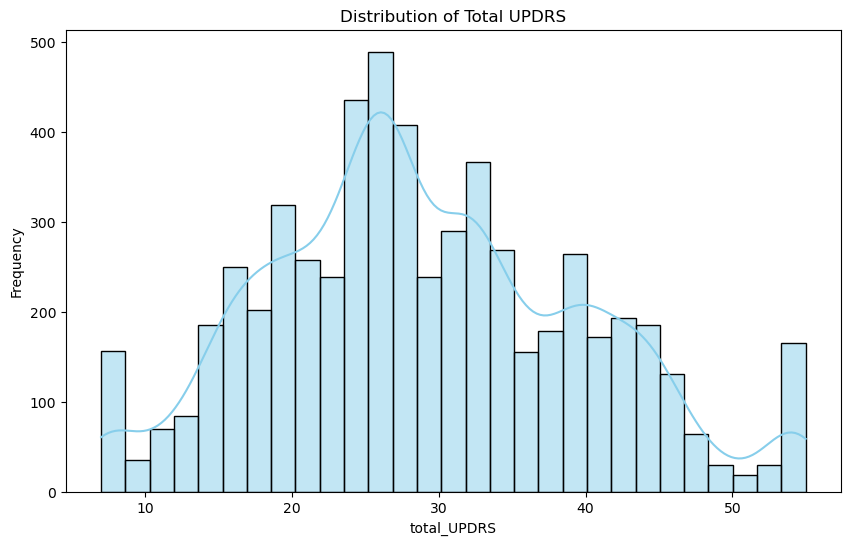

In [61]:
# Plotting the distribution of the target variable 'total_UPDRS'
plt.figure(figsize=(10, 6))
sns.histplot(data['total_UPDRS'], kde=True, color='skyblue')
plt.title("Distribution of Total UPDRS")
plt.xlabel("total_UPDRS")
plt.ylabel("Frequency")
plt.show()

In [63]:
# Dropping the 'motor_UPDRS' column
data = data.drop(columns=['motor_UPDRS'])
print("\nData Shape after dropping 'motor_UPDRS':", data.shape)


Data Shape after dropping 'motor_UPDRS': (5875, 21)


In [65]:
# One-hot encode categorical variables (if applicable, e.g., 'subject_gender')
# Assuming 'subject_gender' exists in the dataset and is categorical
if 'subject_gender' in data.columns:
    data = pd.get_dummies(data, columns=['subject_gender'], drop_first=True)

In [67]:
# Splitting features and target
X = data.drop(columns=['total_UPDRS'])
y = data['total_UPDRS']

## Question 2: Build Linear Regression Model using Cross-Validation



In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
# Linear regression model
lin_reg = LinearRegression()
lin_reg_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
lin_reg_mae = -np.mean(lin_reg_scores)
print("\nLinear Regression MAE:", lin_reg_mae)


Linear Regression MAE: 9.778901787807435


## Question 3: Build Decision Tree Regression Model using Cross-Validatio



In [75]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
# Decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg_scores = cross_val_score(tree_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
tree_reg_mae = -np.mean(tree_reg_scores)
print("Decision Tree Regression MAE:", tree_reg_mae)

Decision Tree Regression MAE: 10.153471931914895


## Question 4: Build Neural Network Model using Cross-Validation

In [94]:
from sklearn.neural_network import MLPRegressor

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
# --- Normalize the features to the range 0 to 1 (Only for Neural Networks) ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
# Neural network model (using scaled features)
nn_reg = MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=42)
nn_reg_scores = cross_val_score(nn_reg, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
nn_reg_mae = -np.mean(nn_reg_scores)
print("Neural Network MAE:", nn_reg_mae)

Neural Network MAE: 10.91879556732753


## Question 5: Compare Performance using MAE and Evaluate Best Model

In [103]:
print("\nModel Comparison (MAE):")
print(f"Linear Regression MAE: {lin_reg_mae}")
print(f"Decision Tree Regression MAE: {tree_reg_mae}")
print(f"Neural Network MAE: {nn_reg_mae}")


Model Comparison (MAE):
Linear Regression MAE: 9.778901787807435
Decision Tree Regression MAE: 10.153471931914895
Neural Network MAE: 10.91879556732753


In [105]:
# Find the best model based on lowest MAE
best_model = min((lin_reg_mae, "Linear Regression"), (tree_reg_mae, "Decision Tree"), (nn_reg_mae, "Neural Network"))
print(f"Best Model: {best_model[1]} with MAE: {best_model[0]}")



Best Model: Linear Regression with MAE: 9.778901787807435


## Question 6: Optimize Decision Tree Model 

In [108]:
from sklearn.model_selection import GridSearchCV

In [110]:
# Parameter grid for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [112]:
# Grid search for Decision Tree
grid_search_tree = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_tree.fit(X, y)
best_tree_model = grid_search_tree.best_estimator_
optimized_tree_mae = -cross_val_score(best_tree_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

In [113]:
print("\nOptimized Decision Tree Parameters:", grid_search_tree.best_params_)
print("Optimized Decision Tree MAE:", optimized_tree_mae)


Optimized Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree MAE: 10.114472232005228
